In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as sp 
import statsmodels.stats as stats
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import pickle 
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
np.set_printoptions(threshold=np.inf) # print numpy array fully 

train_16 = pd.read_csv("../Data/train_2016_v2.csv")
properties_16 = pd.read_csv("../Data/properties_2016.csv")

# intergrating dataset : properties_16 : left, train_16 : right, left join 
df_16 = pd.merge(properties_16, train_16, on="parcelid", how="inner")
                                # transactions은 한 id 의 건물이 여러번 거래 되었을 것이다.(train_16 < pro) 

# how : {'left', 'right', 'outer', 'inner'}, default 'inner'
#     * left: use only keys from left frame, similar to a SQL left outer join;
#       preserve key order
#     * right: use only keys from right frame, similar to a SQL right outer join;
#       preserve key order
#     * outer: use union of keys from both frames, similar to a SQL full outer
#       join; sort keys lexicographically
#     * inner: use intersection of keys from both frames, similar to a SQL inner
#       join; preserve the order of the left keys

del train_16
del properties_16

# column_name : explanation ; dict type" 
with open("../Data/data_dict.p", "rb") as f:
    data_dict = pickle.load(f) 

/Users/MAC/.pyenv/versions/anaconda3-5.0.1/envs/python_ana/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df_16.tail() # 거래가 일어나서 logerror가 있는 properties만 고려 

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
90270,11876798,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,NaN,...,388582.0,596082.0,2015.0,207500.0,7335.81,NaN,NaN,6.037201e+13,0.0276,2016-04-15
90271,12808516,NaN,NaN,NaN,2.0,3.0,NaN,7.0,2.0,NaN,...,86209.0,178408.0,2015.0,92199.0,2441.74,NaN,NaN,6.037407e+13,-0.1188,2016-06-07
90272,12010248,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,...,129000.0,420000.0,2015.0,291000.0,5070.41,NaN,NaN,6.037191e+13,0.0843,2016-06-30
90273,14310905,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,389474.0,1215816.0,2015.0,826342.0,12508.30,NaN,NaN,NaN,-0.0050,2016-03-31
90274,14636609,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,237048.0,471286.0,2015.0,234238.0,5470.12,NaN,NaN,NaN,0.0129,2016-09-13


In [3]:
df_16.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,9.027500e+04,28781.000000,261.000000,43.000000,90275.000000,90275.000000,16.0,57364.000000,89093.000000,658.0,...,89519.000000,20570.000000,8.989500e+04,9.027400e+04,90275.0,9.027400e+04,90269.000000,1783.000000,8.967000e+04,90275.000000
mean,1.298466e+07,1.816372,7.229885,713.581395,2.279474,3.031869,4.0,5.565407,2.309216,66.0,...,1968.532870,1.440739,1.800934e+05,4.576726e+05,2015.0,2.783353e+05,5983.975927,13.402692,6.049151e+13,0.011457
std,2.504510e+06,2.974168,2.716196,437.434198,1.004271,1.156436,0.0,1.900602,0.976172,0.0,...,23.763475,0.544498,2.091299e+05,5.548844e+05,0.0,4.004955e+05,6838.876956,2.715966,2.046605e+11,0.161079
min,1.071174e+07,1.000000,2.000000,100.000000,0.000000,0.000000,4.0,1.000000,1.000000,66.0,...,1885.000000,1.000000,1.000000e+02,2.200000e+01,2015.0,2.200000e+01,49.080000,6.000000,6.037101e+13,-4.605000
25%,1.155950e+07,1.000000,7.000000,407.500000,2.000000,2.000000,4.0,4.000000,2.000000,66.0,...,1953.000000,1.000000,8.124500e+04,1.990232e+05,2015.0,8.222800e+04,2872.830000,13.000000,6.037320e+13,-0.025300
50%,1.254734e+07,1.000000,7.000000,616.000000,2.000000,3.000000,4.0,7.000000,2.000000,66.0,...,1970.000000,1.000000,1.320000e+05,3.428720e+05,2015.0,1.929700e+05,4542.750000,14.000000,6.037615e+13,0.006000
75%,1.422755e+07,1.000000,7.000000,872.000000,3.000000,4.000000,4.0,7.000000,3.000000,66.0,...,1987.000000,2.000000,2.105345e+05,5.405890e+05,2015.0,3.454195e+05,6901.090000,15.000000,6.059042e+13,0.039200
max,1.629608e+08,13.000000,21.000000,1555.000000,20.000000,16.000000,4.0,12.000000,20.000000,66.0,...,2015.000000,4.000000,9.948100e+06,2.775000e+07,2015.0,2.450000e+07,321936.090000,99.000000,6.111009e+13,4.737000


In [18]:
df_16.dtypes

parcelid                          int64
airconditioningtypeid             int64
architecturalstyletypeid          int64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


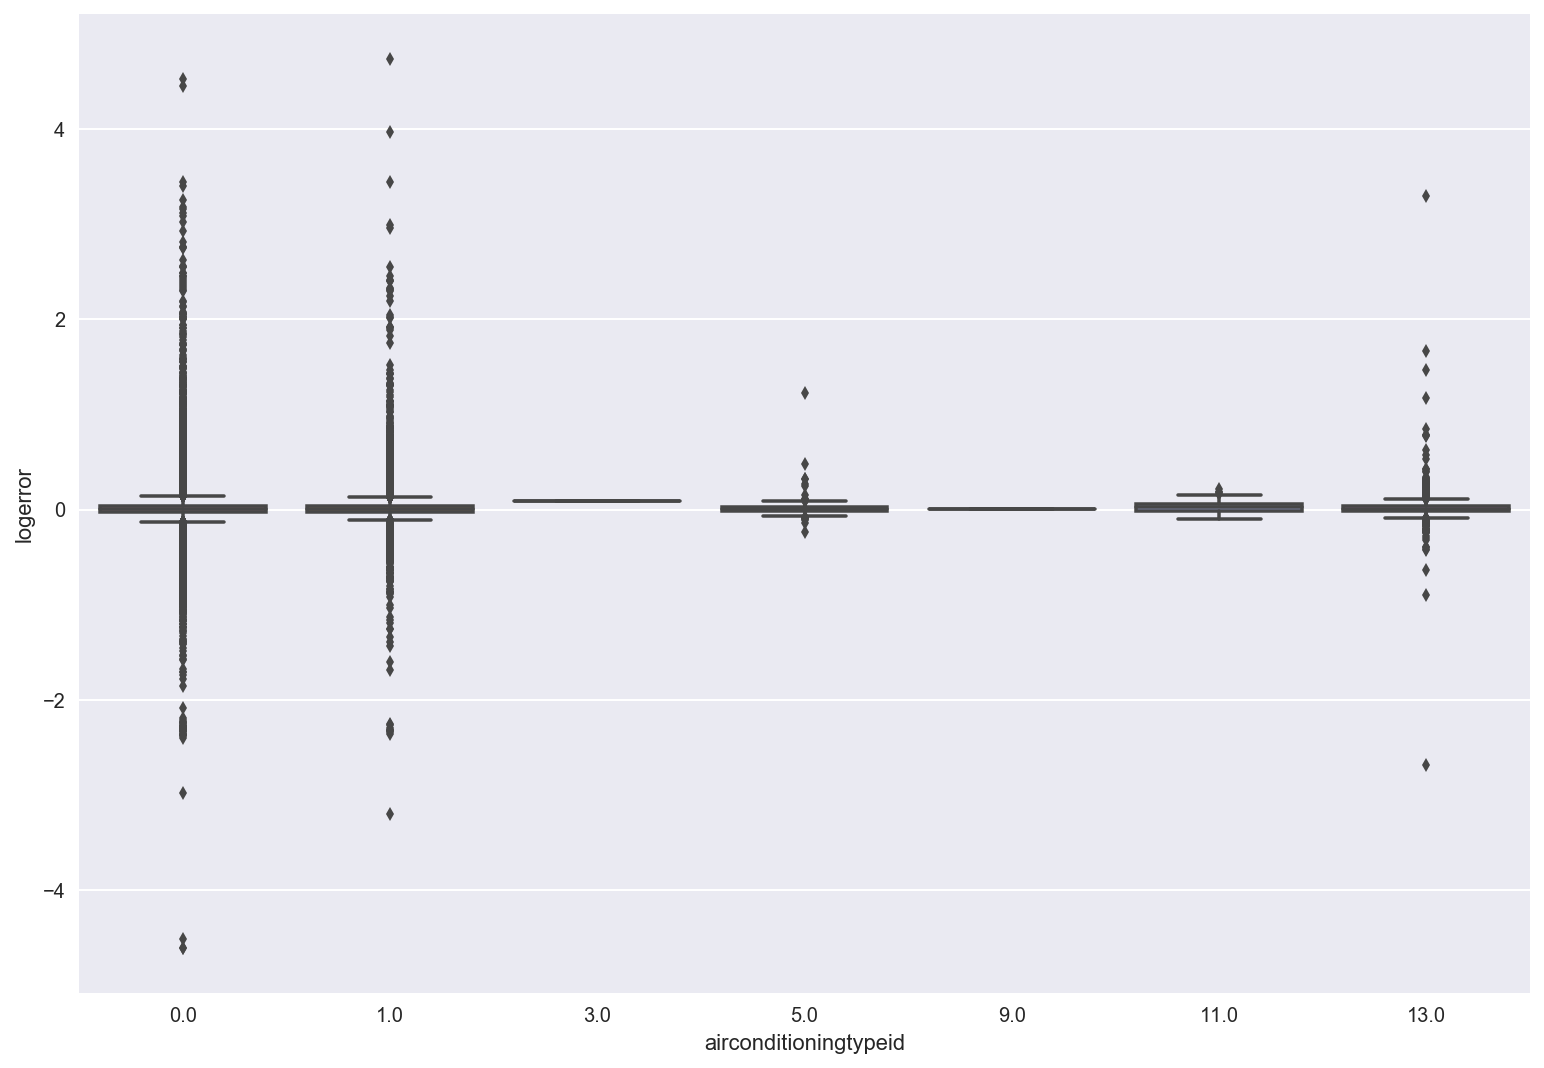

(90275,)


0    0
1    0
2    0
3    0
4    0
Name: airconditioningtypeid, dtype: int64

In [5]:
sns.set(rc={"figure.figsize": (13, 9)})
sns.boxplot(x="airconditioningtypeid", y="logerror", data=df_16.fillna(0)) #fillna를 하기 전에도 결과는 똑같다. 
plt.show() # 에어컨 타입 별로 차이를 해석 하기 힘들다. 차이가 보이는 부분은 데이터의 개수 차이 때문에 의미가 흐려져있다. 
#### 이 건 그냥 one hot으로 취급 하고, nan -> 0 
onehot_cols = ["airconditioningtypeid"]

df_16.airconditioningtypeid = [int(x) for x in df_16.airconditioningtypeid.fillna(0)]
print(df_16.airconditioningtypeid.shape)
df_16.airconditioningtypeid[:5]

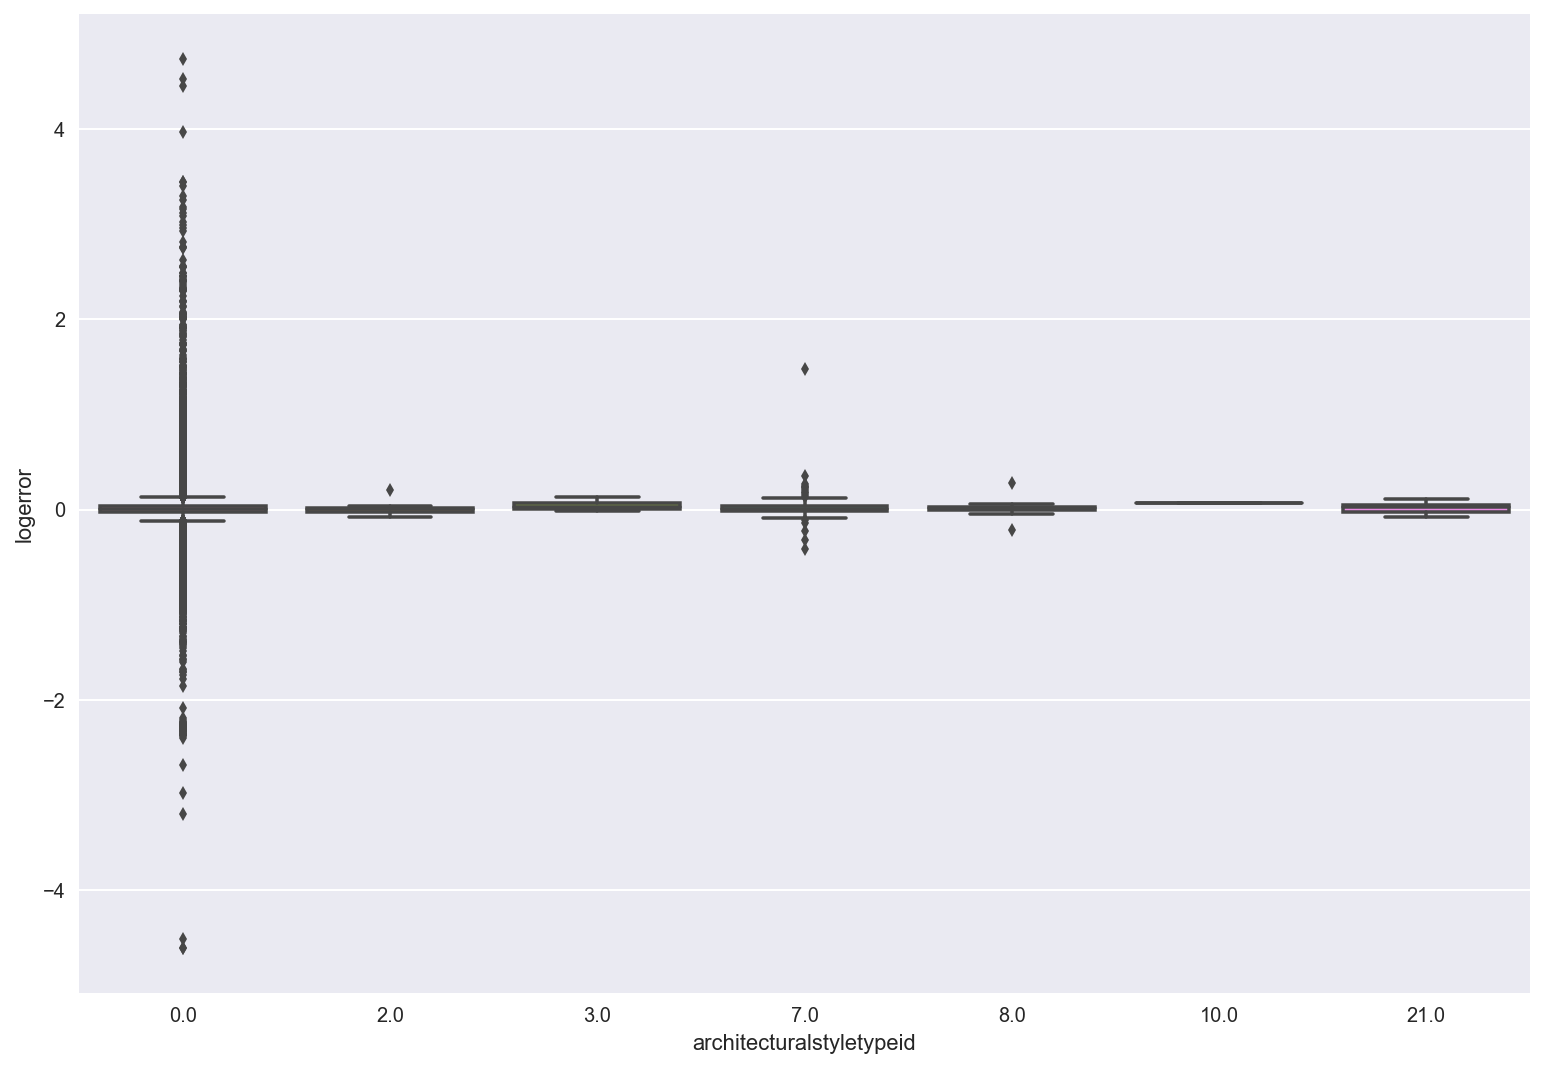

In [6]:
sns.set(rc={"figure.figsize": (13, 9)})
sns.boxplot(x="architecturalstyletypeid", y="logerror", data=df_16.fillna(1)) #fillna를 하기 전에도 결과는 똑같다. 
plt.show() # 에어컨 타입 별로 차이를 해석 하기 힘들다. 차이가 보이는 부분은 데이터의 개수 차이 때문에 의미가 흐려져있다. 
#### 이 건 그냥 one hot으로 취급 하고, nan -> 0 
# df_16.airconditioningtypeid = [int(x) for x in df_16.airconditioningtypeid.fillna(0)]
# print(df_16.airconditioningtypeid.shape)
# df_16.airconditioningtypeid[:5]



In [7]:
ach_type_val, ach_type_counts = np.unique(df_16["architecturalstyletypeid"].fillna(1), return_counts=True)
print('architecturalstyletypeid')
pd.DataFrame(ach_type_counts, index=ach_type_val, columns=['count'])

architecturalstyletypeid


,count
1.0,90014
2.0,11
3.0,4
7.0,221
8.0,16
10.0,1
21.0,8


In [8]:
nan = df_16.architecturalstyletypeid.values[0]
nan

nan

-  1.0  -
0.16118848531527757
-  2.0  -
0.0700146006024505
-  3.0  -
0.056112092056881994
-  7.0  -
0.12259377165012414
-  8.0  -
0.0927003183567214
-  10.0  -
0.0
-  21.0  -
0.05741125216366562


0    1
1    1
2    1
3    1
4    1
Name: architecturalstyletypeid, dtype: int64

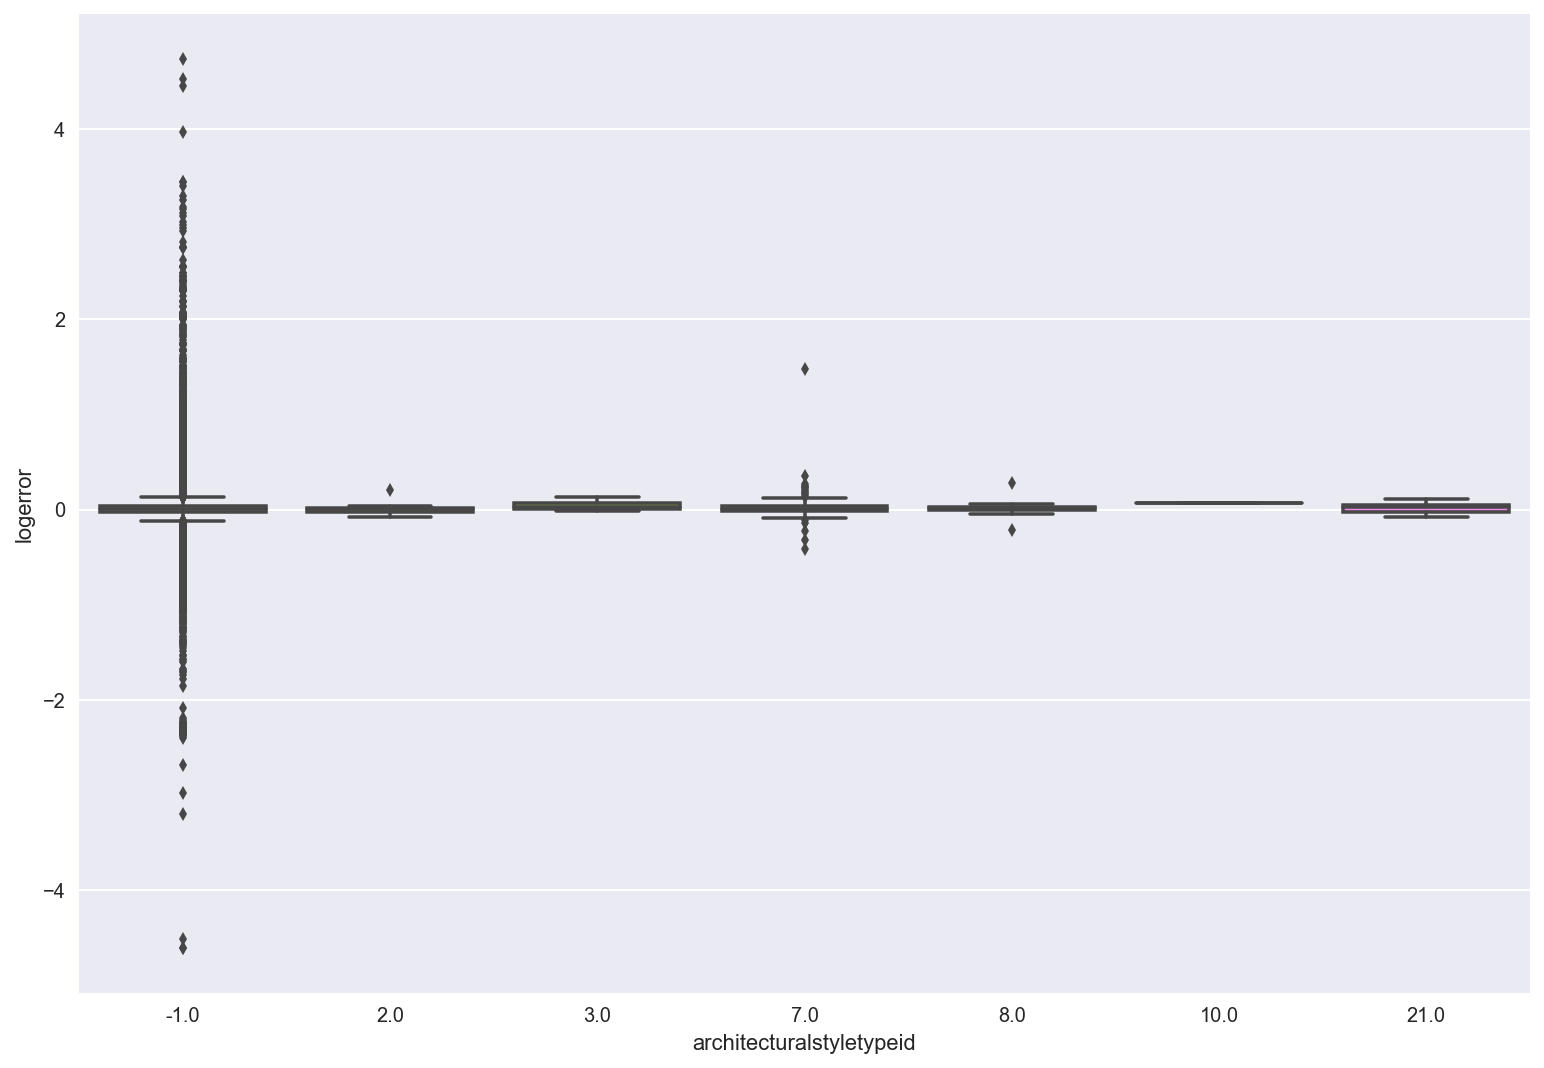

In [9]:
# 난 값이 대부분 이고 nan 값이면 로그에러의 분산이 커보인다. 
sns.boxplot(x="architecturalstyletypeid", y='logerror', data=df_16.fillna(-1, inplace=False))
# 실제 수치적으로는 아래와 같다. 모표준편차 추정값
for t in ach_type_val:
    arc_type_t_std = []
    print("- ", t, " -")
    if t == 1:
        print(np.std(df_16.fillna(1, inplace=False)[df_16.architecturalstyletypeid.isna()].logerror))
        continue
    print(np.std(df_16.fillna(1, inplace=False)[df_16.architecturalstyletypeid == t].logerror))
    
## 이 것 역시 onehot그냥 원핫으로 -1로 nan imputation 
onehot_cols.append("architecturalstyletypeid")

## Imputation
df_16.architecturalstyletypeid = [int(x) for x in df_16.architecturalstyletypeid.fillna(1)]
df_16.architecturalstyletypeid[:5]

,Finished living area below or partially below ground level


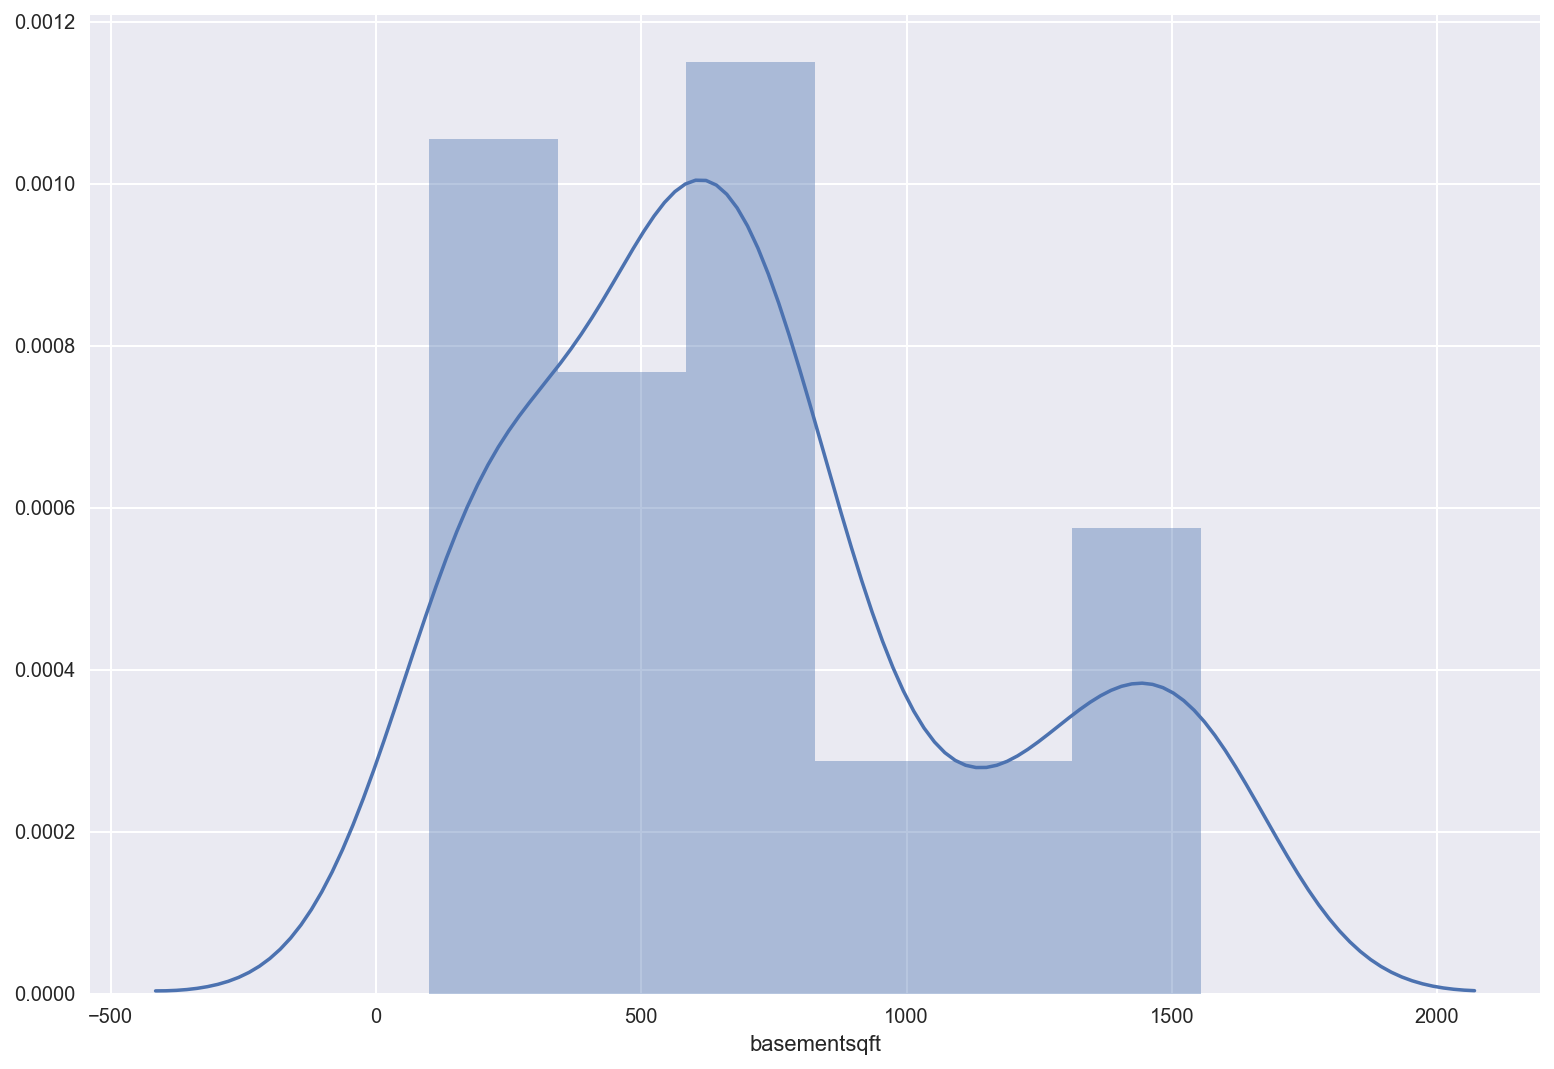

In [10]:
### basementsqft -> ,Finished living area below or partially below ground level
#### -> 있을 때만, 측정 되었을 것이다. 
print(data_dict["basementsqft"])

# np.min(df_16.basementsqft) == 100.0
sns.distplot(df_16.basementsqft.dropna())

In [11]:
df_16.basementsqft.dropna().shape # 43 개의 값만 있다.
# nan을 0으로 넣고, loggerror와의 상관계수와scatter를 그려 보자 

(43,)

cor,   p-value
(0.009019339896495443, 0.006729329677202943)
spearman
SpearmanrResult(correlation=0.008510443935220246, pvalue=0.010556655551209129)


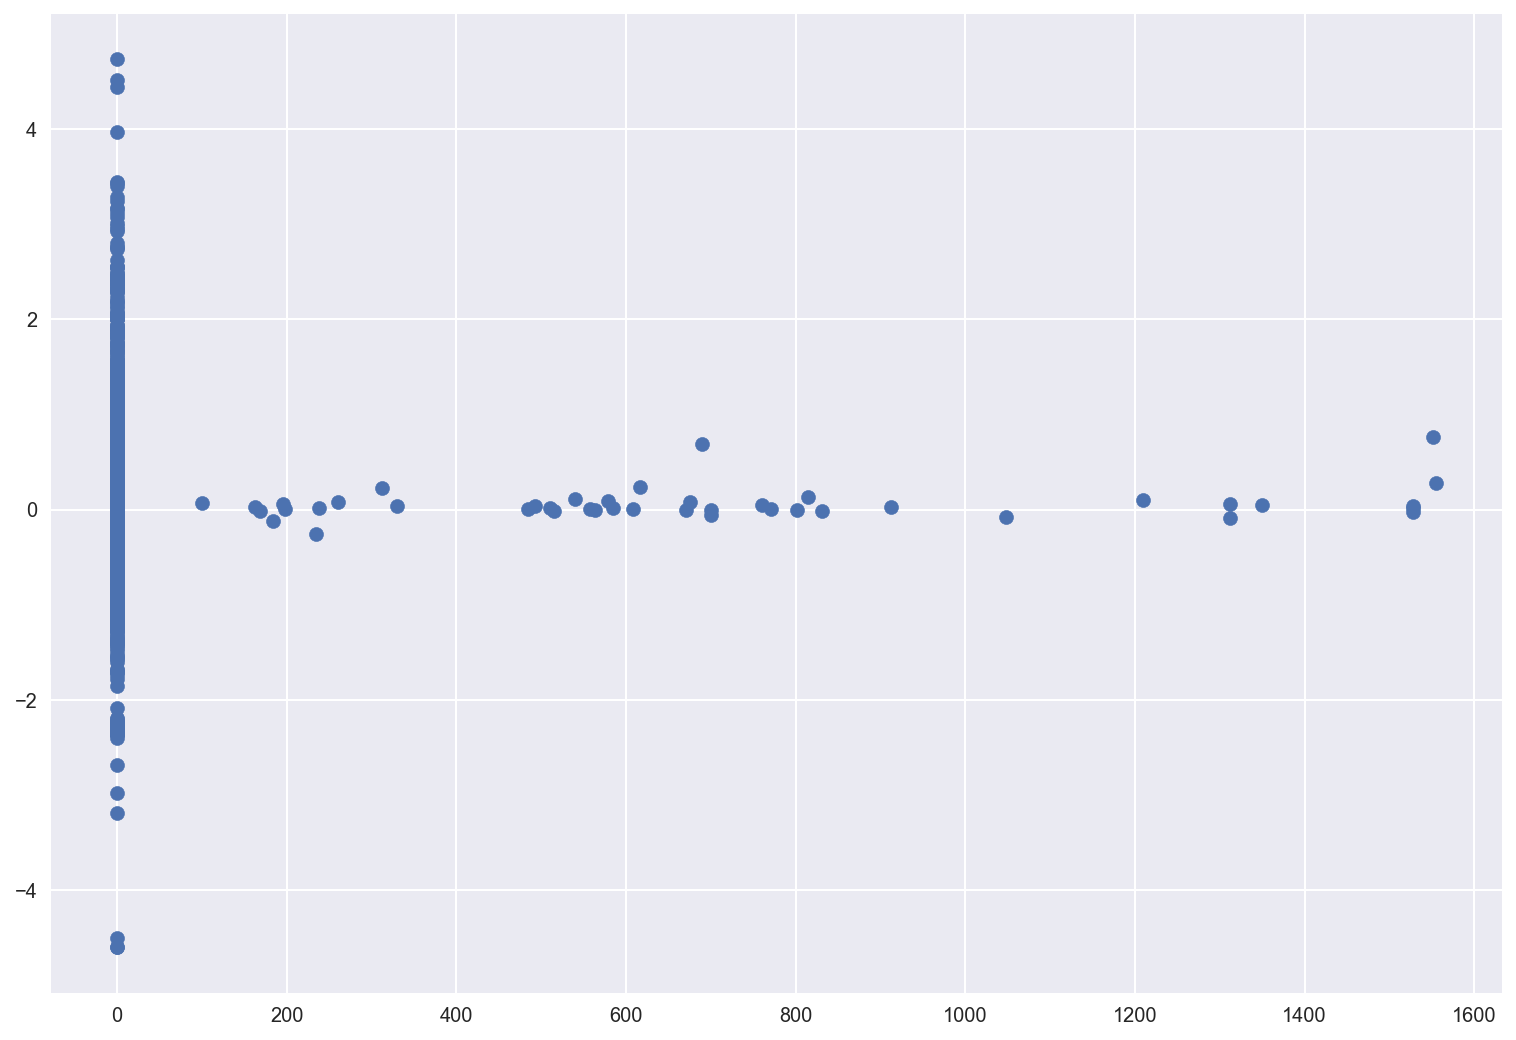

In [28]:
# correlation 선형! 
print("cor,   p-value" )
print(sp.stats.pearsonr(df_16.basementsqft.fillna(0), df_16.logerror))
print('spearman')
print(sp.stats.spearmanr(df_16.basementsqft.fillna(0), df_16.logerror))
plt.scatter(df_16.basementsqft.fillna(0), df_16.logerror) 
#Target과의 상관관계가 없다. nan 값은 그냥 0과 min값보다 작은 99 두가지를 시도 해보겠다. 
df_16.basementsqft = df_16.basementsqft.fillna(0)

,Number of bathrooms in home including fractional bathrooms


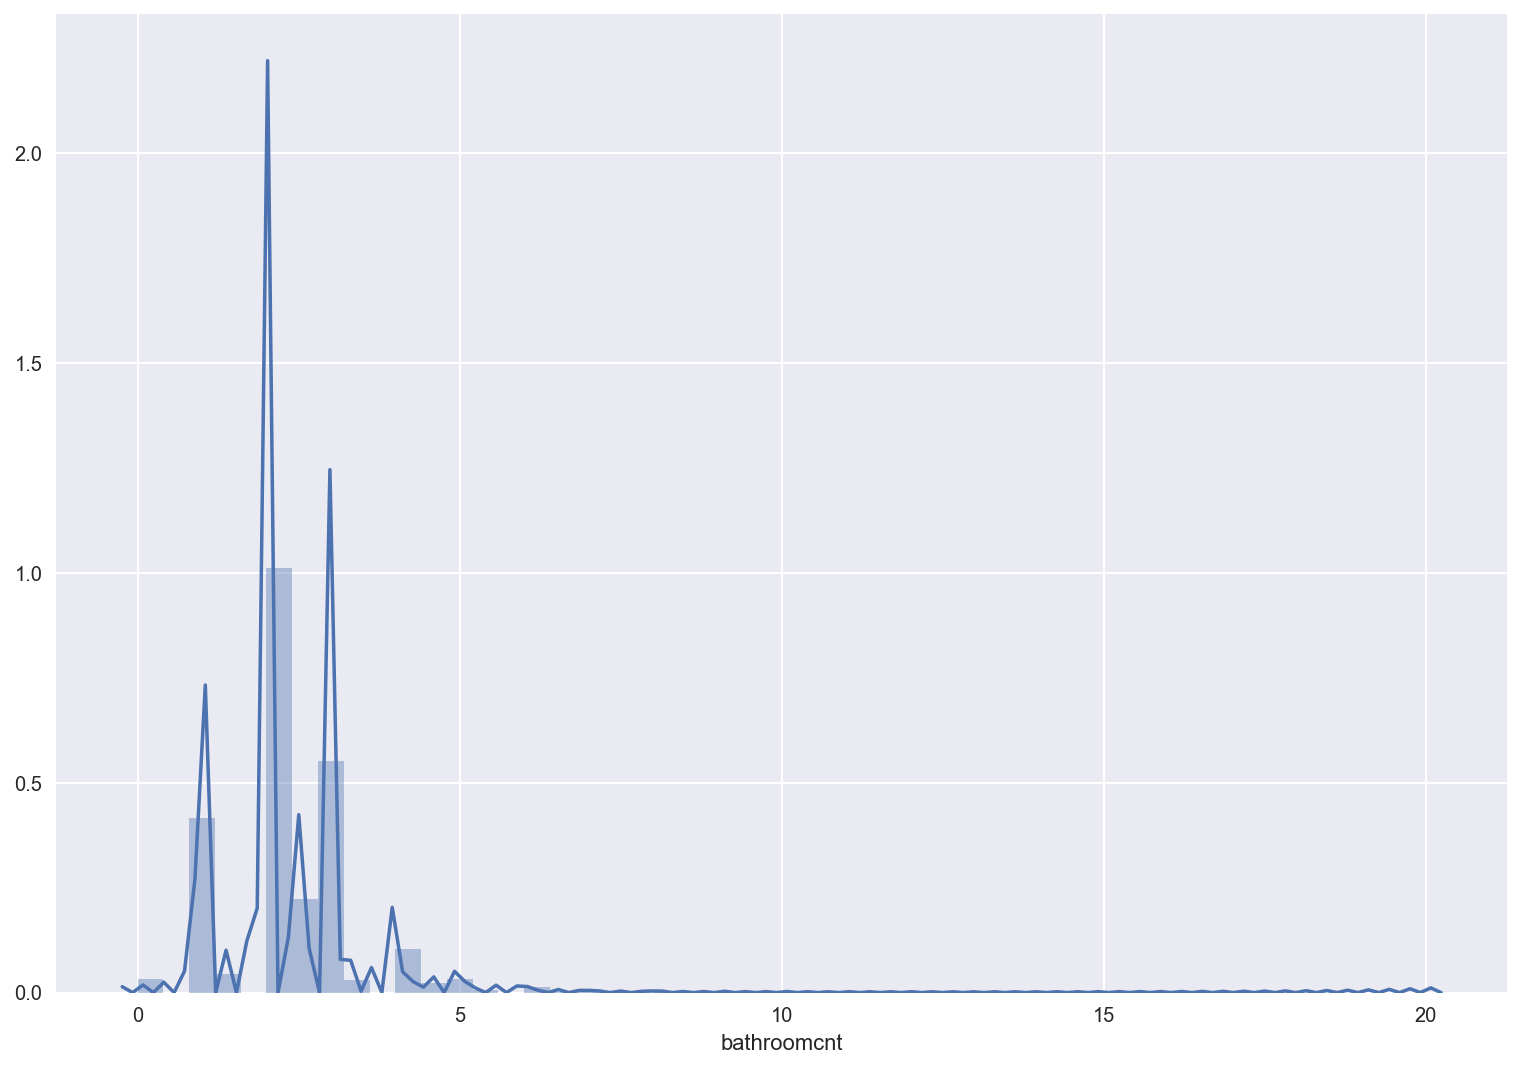

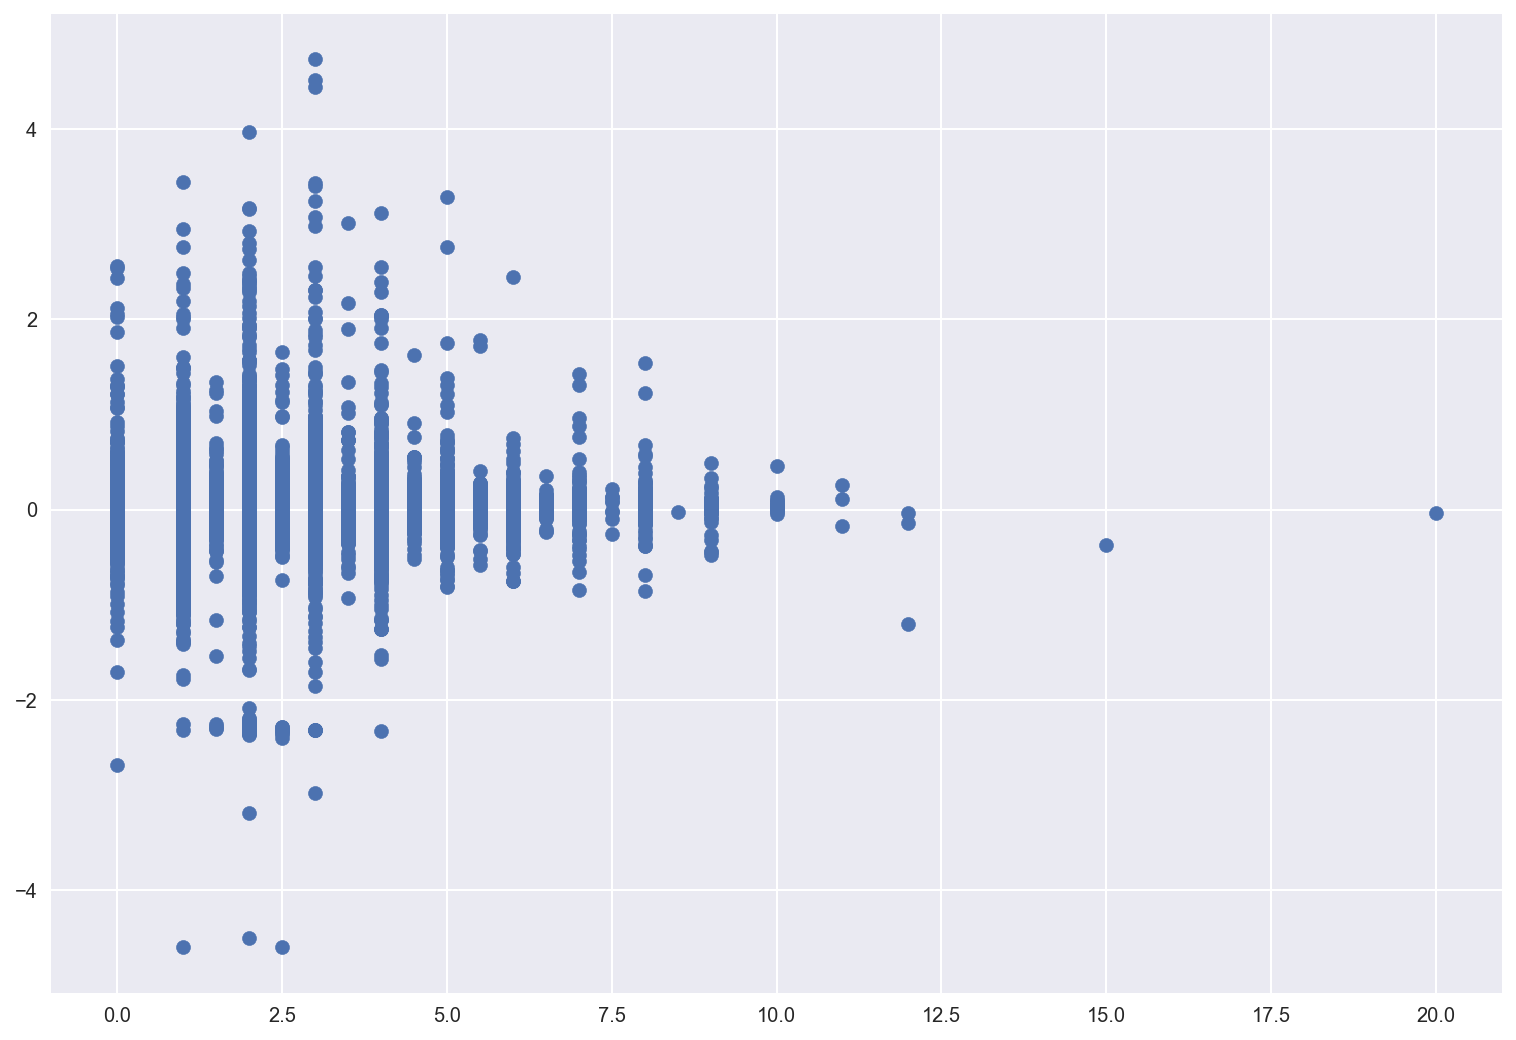

In [26]:
print(data_dict["bathroomcnt"])
# plt.figure()
# sns.distplot(df_16.bathroomcnt)
plt.figure()
plt.scatter(df_16.bathroomcnt, df_16.logerror)

#  아무 처리 안함 
